In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense, Input

2024-03-23 11:16:02.835283: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 11:16:04.029578: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 11:16:07.094969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 11:16:10.300114: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

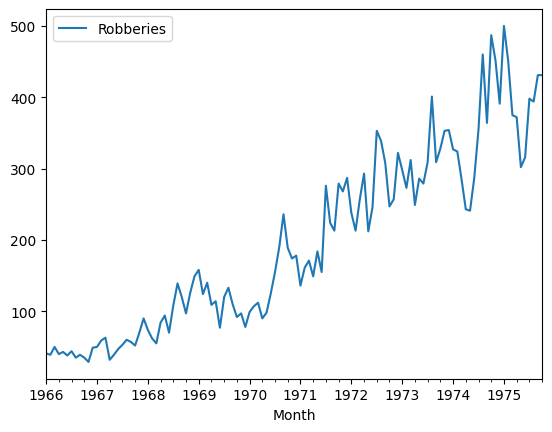

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [3]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 20
n_past = 40

x = []
for i in range(len(normalized_df) - n_past - 1):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_past, len(normalized_df)-n_future+1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

Number of samples in training set: 47
Number of samples in validation set: 6
Number of samples in test set: 6
(47, 40, 1)
(6, 40, 1)
(6, 40, 1)
(47, 20, 1)
(6, 20, 1)
(6, 20, 1)


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 1)          │           101 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2961 - val_loss: 0.2013
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - loss: 0.2203 - val_loss: 0.1432
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1534 - val_loss: 0.0893
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0926 - val_loss: 0.0436
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0438 - val_loss: 0.0220
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0280 - val_loss: 0.0409
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0624 - val_loss: 0.0410
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0624 - val_loss: 0.0272
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0407 - val_loss: 0.0195
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.0260 - val_loss: 0.0202
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0228 - val_loss: 0.0251
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0259 - val_

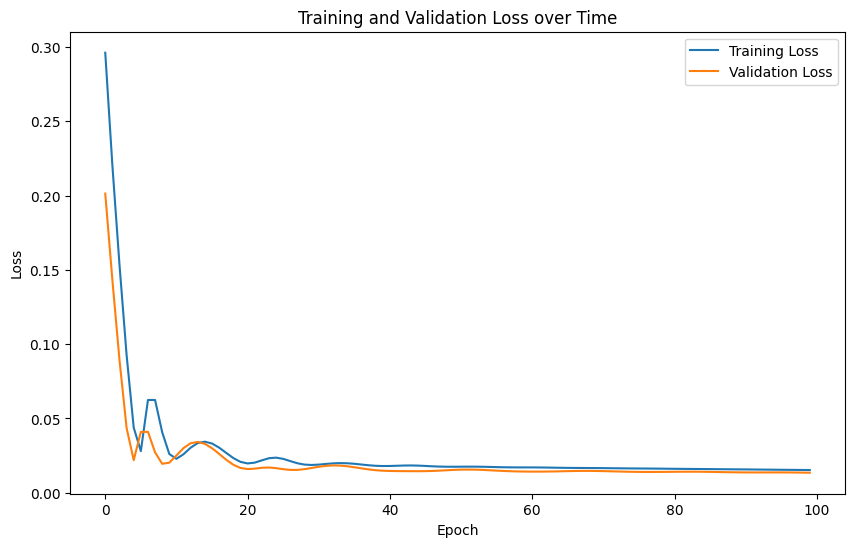

In [4]:
batch_size = x_train.shape[0]
epochs = 100
hidden_layer = 100

model = Sequential()
model.add(LSTM(hidden_layer, input_shape=(n_past, n_features)))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
MAPE: 18.28053350447552
RMSE: 65.06468340655073
AME: 52.242361831665036


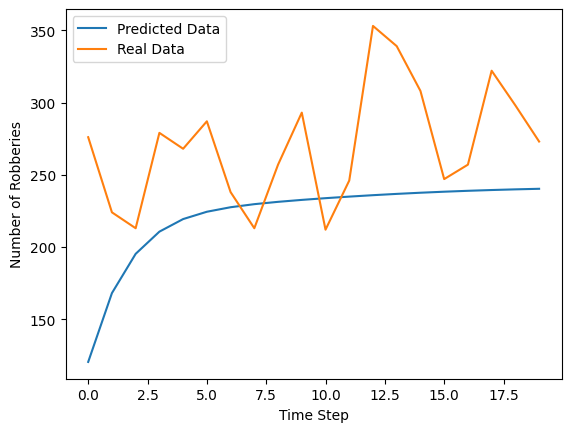

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAPE: 14.681852926783401
RMSE: 49.81930734460324
AME: 38.98232460021973


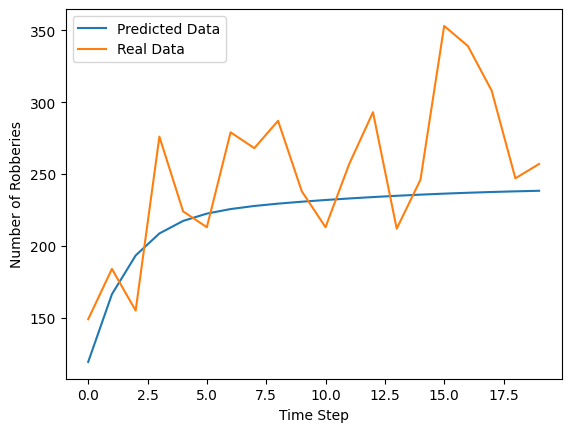

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAPE: 17.542573235993558
RMSE: 76.38958481897029
AME: 60.1613037109375


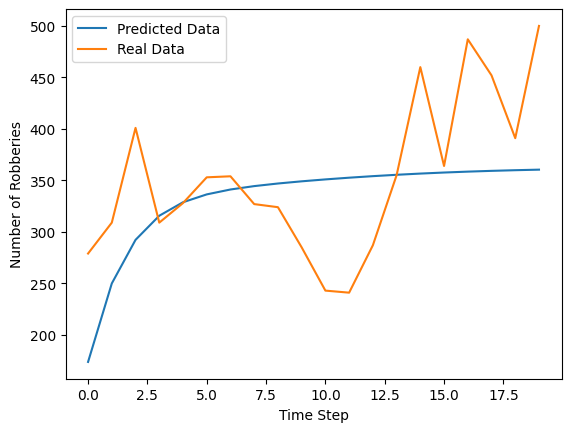

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAPE: 16.57907331317391
RMSE: 56.00726529221673
AME: 45.70423355102539


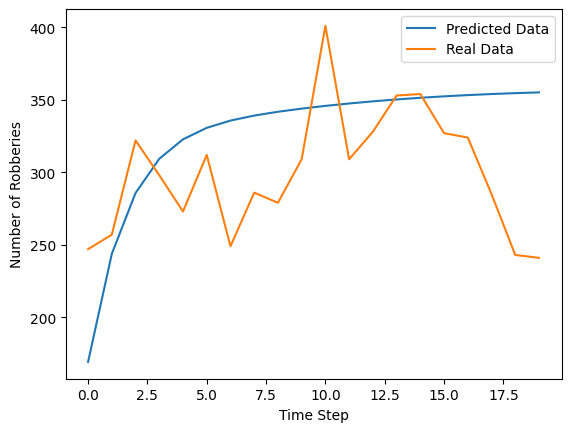

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAPE: 18.27024269689477
RMSE: 75.1768413605344
AME: 61.65542221069336


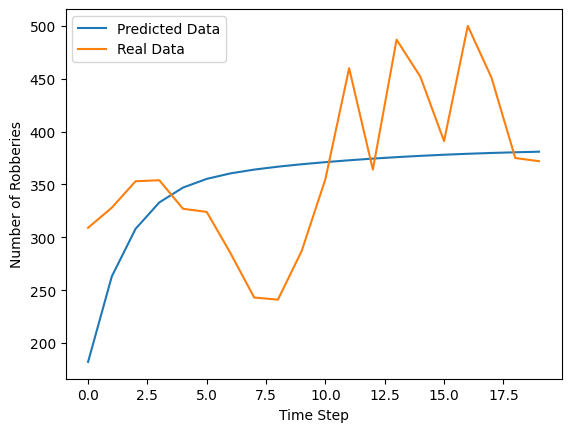

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAPE: 14.752222800216048
RMSE: 54.98305738016481
AME: 42.03371047973633


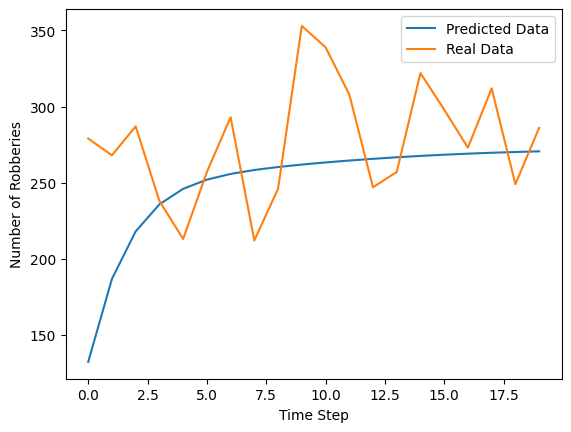

In [5]:
predictions = []
for i, x in enumerate(x_val):
    x = x.reshape(1,n_past,1)
    predicted = denormalize_data(model.predict(x)).flatten()
    predictions.append(predicted)
    real = denormalize_data(y_val[i].flatten())
    
    print(f"MAPE: {np.mean(np.abs((real - predicted) / real)) * 100}")
    print(f"RMSE: {np.sqrt(np.mean((real - predicted) ** 2))}")
    print(f"AME: {np.mean(np.abs(real - predicted))}")
    
    plt.plot(predicted, label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()

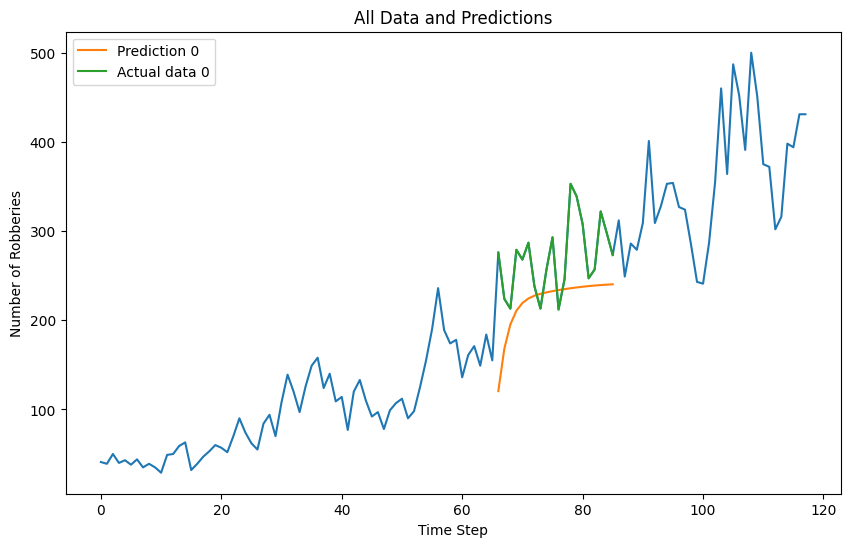

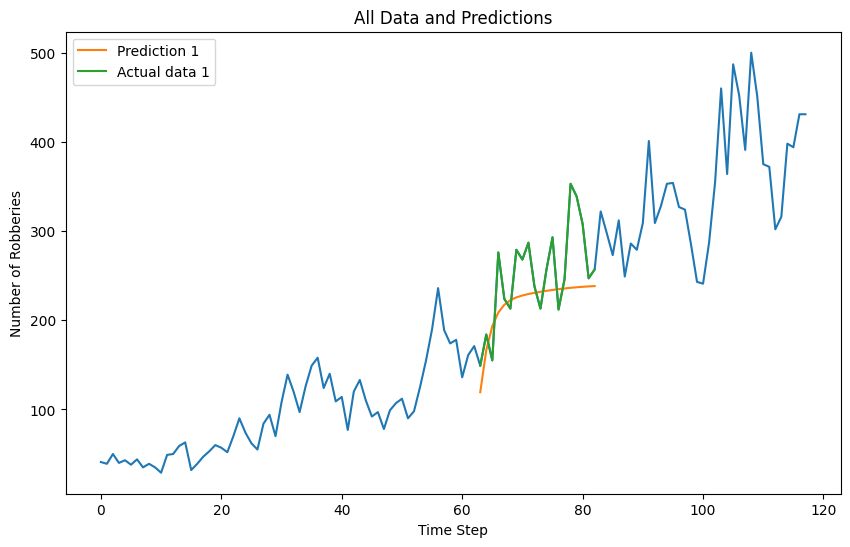

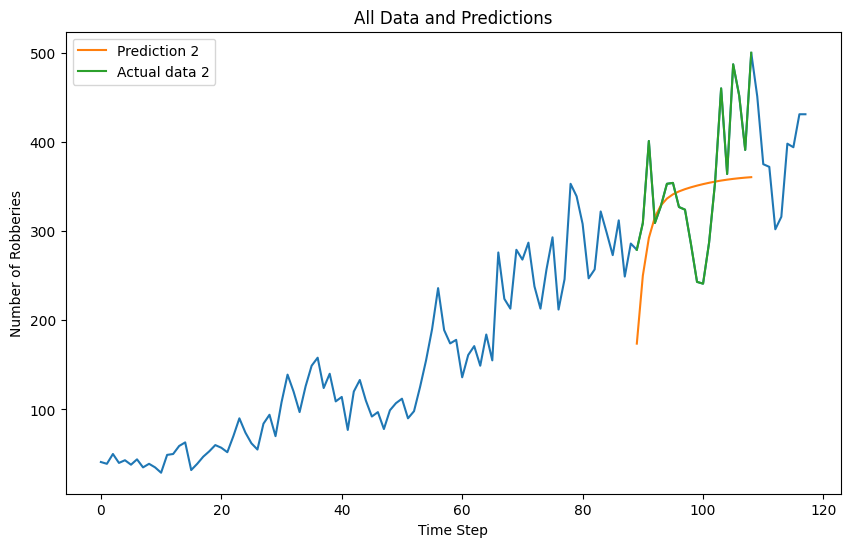

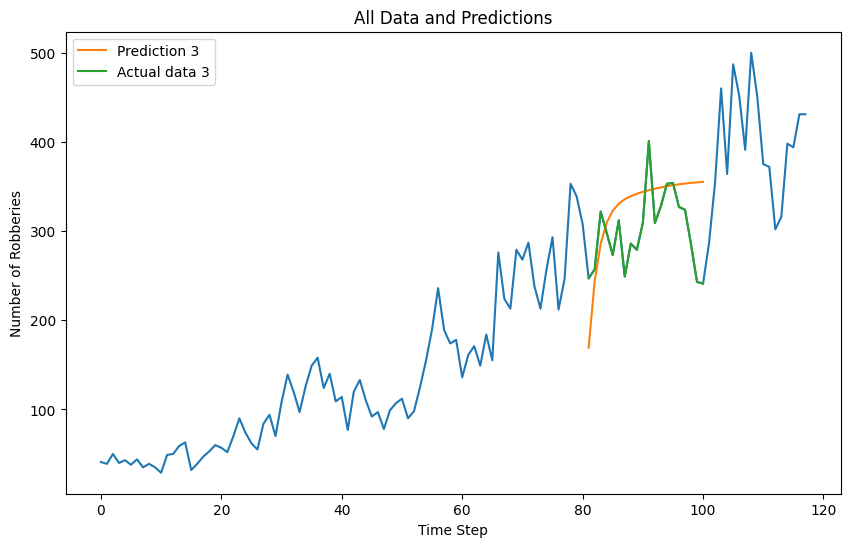

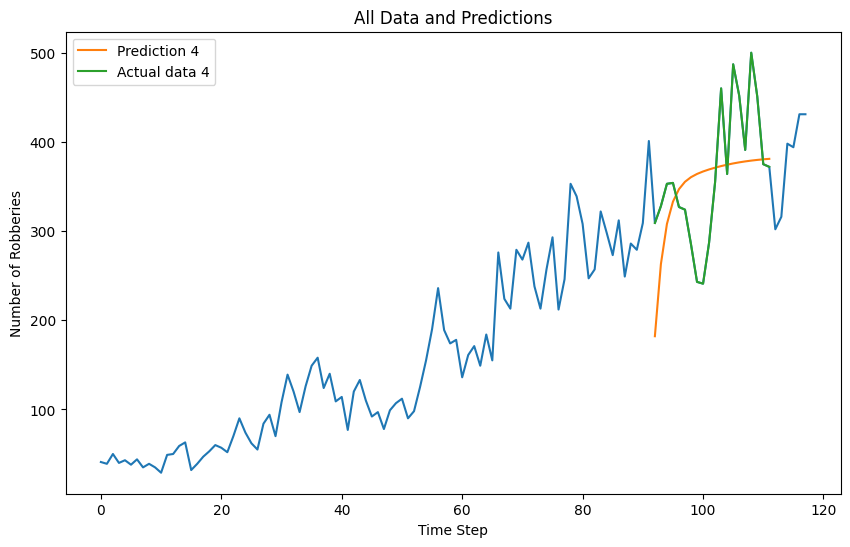

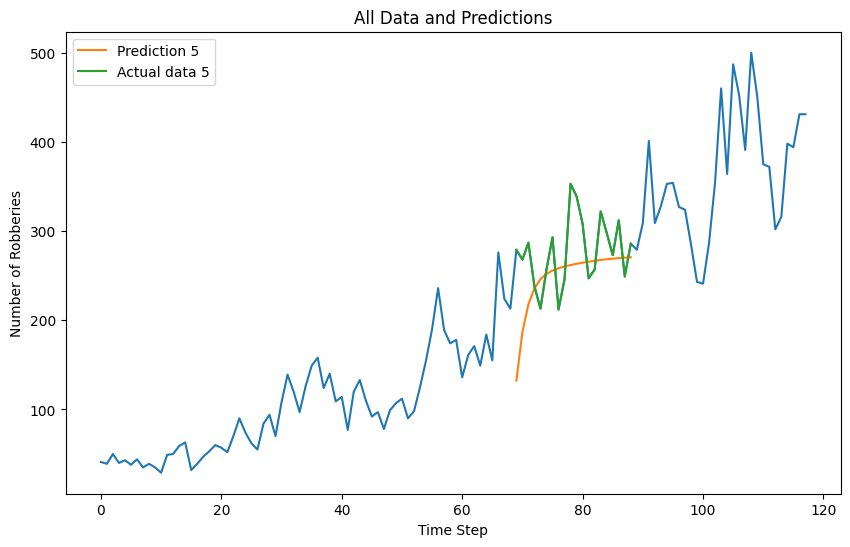

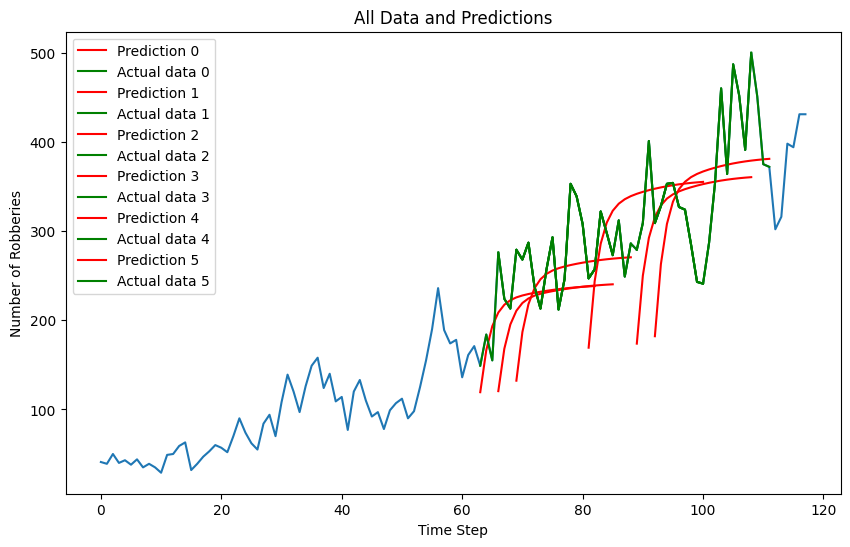

In [6]:
robberies_values = denormalize_data(normalize_data(df['Robberies'].values))
predicted_values = []



for i, p in enumerate(predictions):
    index = val_indices[i] + n_past
    x_values = [j for j in range(index,index+n_future)]
    plt.figure(figsize=(10, 6))
    plt.plot(robberies_values)
    plt.plot(x_values,p, label=f"Prediction {i}")
    plt.plot(x_values,denormalize_data(y_val[i].flatten()), label=f"Actual data {i}")
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.title('All Data and Predictions')
    plt.legend()
    plt.show()


plt.figure(figsize=(10, 6))
plt.plot(robberies_values)

for i, p in enumerate(predictions):
    index = val_indices[i] + n_past
    x_values = [j for j in range(index,index+n_future)]
    plt.plot(x_values,p, label=f"Prediction {i}", color="red")
    plt.plot(x_values,denormalize_data(y_val[i].flatten()), label=f"Actual data {i}", color="green")

plt.xlabel('Time Step')
plt.ylabel('Number of Robberies')
plt.title('All Data and Predictions')
plt.legend()
plt.show()